In [1]:
from src.solarsys import System, G, AU, T, M
from src.astroquery import fetch_vectors
import numpy as np
from tqdm.notebook import tqdm
from datetime import datetime


In [2]:
import matplotlib.animation as animation
from IPython.display import HTML

from mpl_toolkits.mplot3d import Axes3D
from src.animate import AnimateList_Point

In [3]:
from src.utils import load_parameters

PARAMS = load_parameters()

# Define Solar System

In [4]:
# Define planets
names = ['sun', 'mercury', 'venus', 'true_earth', 'moon', 'mars', 'jupyter', 'saturn', 'uranus', 'neptune', 'pluto']
masses = {
    'sun': 1,
    'mercury': 3.3011 * 10**23 / M,
    'venus': 4.8675 * 10**24 / M,
    'true_earth': 5.97219 * 10**24 / M,
    'moon': 7.342 * 10**22 / M,
    'mars': 6.4171 * 10**23 / M,
    'jupyter': 1.89813 * 10**27 / M,
    'saturn': 5.6834 * 10**26 / M,
    'uranus': 8.6810 * 10**25 / M,
    'neptune': 1.02413 * 10**26 / M,
    'pluto': 1.303 * 10**22 / M
}

positions, velocities = fetch_vectors(names, time=datetime.now().strftime("%Y-%m-%d"))

In [5]:
# Define system
m_in = np.array(list(masses.values()))
p_in = np.array(list(positions.values()))
v_in = np.array(list(velocities.values()))

steps_per_day = 10
solar_sys = System(n=len(names), dt=1/steps_per_day, m_in=m_in, p_in=p_in, v_in=v_in, sun_static=False)

# Test Energy conservation

In [6]:
n_days = 365
n_years = 100
U = np.zeros(shape=(n_years,1))
K = np.zeros(shape=(n_years,1))

for i in tqdm(range(n_years)):
    solar_sys.motion(steps_per_day * n_days)
    U[i] = solar_sys.U
    K[i] = solar_sys.K

  0%|          | 0/100 [00:00<?, ?it/s]

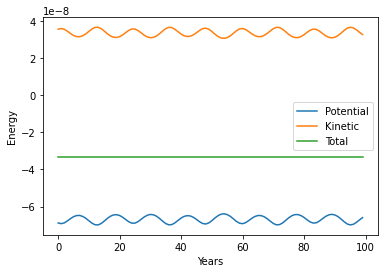

In [7]:
import matplotlib.pyplot as plt
plt.plot(U, label='Potential')
plt.plot(K, label='Kinetic')
plt.plot(U+K, label='Total')
plt.xlabel('Years')
plt.ylabel('Energy')
plt.legend();

# Save trajectories

In [8]:
solar_sys.reset()

In [9]:
n_days = 365
n_years = 100

positions = np.zeros(shape=(steps_per_day*n_days*n_years, len(names), 3), dtype=np.float64)
for i in tqdm(range(n_years)):
    dump_positions = solar_sys.motion_dump(steps_per_day * n_days)
    init = i*steps_per_day * n_days
    end = (i+1)*steps_per_day * n_days
    positions[init:end, :, :] = dump_positions


  0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
positions.shape

(365000, 11, 3)

# Test trajectories

## Inner Planets

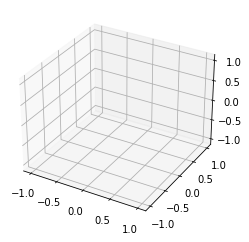

In [11]:
# Set Figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1]);

In [12]:
# Prepare system
n_days = 365
delta_step = 10
traj_len = int(n_days / (delta_step * solar_sys.dt)) # 1 year

In [13]:
# Creating the Animation object
an = AnimateList_Point(ax=ax, system=solar_sys, delta_step=delta_step, names=names, subnames=['sun', 'mercury', 'venus', 'true_earth', 'mars'])
ani = animation.FuncAnimation(
    fig, an, frames=traj_len, interval=50, fargs=(positions,), blit=False, repeat=True)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
fig.subplots_adjust(right=0.8)   
HTML(ani.to_html5_video())

## Outer Planets

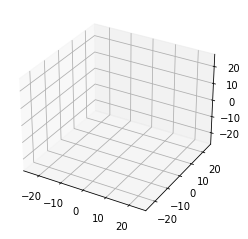

In [14]:
# Set Figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim([-26, 26])
ax.set_ylim([-26, 26])
ax.set_zlim([-26, 26]);

In [15]:
# Prepare system
n_years = 100
n_days = 365 * n_years
delta_step = 1000
traj_len = int(n_days / (delta_step * solar_sys.dt)) # 1 year

In [16]:
# Creating the Animation object
an = AnimateList_Point(ax=ax, system=solar_sys, delta_step=delta_step, names=names, subnames=['sun', 'jupyter', 'saturn', 'uranus', 'neptune', 'pluto'])
ani = animation.FuncAnimation(
    fig, an, frames=traj_len, interval=50, fargs=(positions,), blit=False, repeat=True)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
fig.subplots_adjust(right=0.8)   
HTML(ani.to_html5_video())

/Users/alessio/Documents/GitHub/gravitational_sim/.venv/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


## Earth and Moon

In [17]:
# Repeat simulation with finer time step
solar_sys.reset()

n_days = 30
steps_per_day = 100
solar_sys = System(n=len(names), dt=1/steps_per_day, m_in=m_in, p_in=p_in, v_in=v_in, sun_static=False)

positions = np.zeros(shape=(steps_per_day*n_days, len(names), 3), dtype=np.float64)
for i in tqdm(range(n_days)):
    dump_positions = solar_sys.motion_dump(steps_per_day)
    init = i*steps_per_day
    end = (i+1)*steps_per_day
    positions[init:end, :, :] = dump_positions

  0%|          | 0/30 [00:00<?, ?it/s]

In [18]:
# Define Moon's position relative to Earth
positions[:, 4, :] = positions[:, 4, :] - positions[:, 3, :]
positions[:, 3, :] = 0

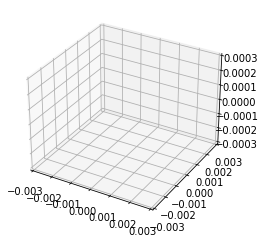

In [19]:
# Set Figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim([-0.003, 0.003])
ax.set_ylim([-0.003, 0.003])
ax.set_zlim([-0.0003, 0.0003]);

In [20]:
# Prepare system
n_days = 30
delta_step = 10
traj_len = int(n_days / (delta_step * solar_sys.dt)) # 1 year

In [21]:
# Creating the Animation object
an = AnimateList_Point(ax=ax, system=solar_sys, delta_step=delta_step, names=names, subnames=['true_earth', 'moon'])
ani = animation.FuncAnimation(
    fig, an, frames=traj_len, interval=50, fargs=(positions,), blit=False, repeat=True)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
fig.subplots_adjust(right=0.8)   
HTML(ani.to_html5_video())